# Prediksi Biaya Asuransi Kesehatan Personal

### Problem
- Asuransi kesehatan biayanya mahal
- Di Indonesia, adanya BPJS Kesehatan

### Background
Kesadaran berasuransi yang masih minim boleh jadi dipengaruhi oleh banyaknya pemahaman yang keliru tentang asuransi.

Berikut ini beberapa pandangan yang keliru tentang asuransi kesehatan yang banyak beredar di masyarakat:
- Beli asuransi kesehatan sama saja buang-buang uang
- Percuma beli tapi klaim sulit
- Mencampuradukkan fungsi proteksi dan investasi
- Asuransi kesehatan biayanya mahal
- BPJS Kesehatan sudah memadai

Biaya premi pada setiap pasien berbeda-beda. Biaya tersebut tergantung pada banyak faktor, antara lain diagnosis penyakit, jenis/tempat perawatan, kota, usia, dan sebagainya.

**Sekedar informasi:**
- Makin tua umur nasabah maka preminya akan semakin mahal.
- Premi juga akan semakin mahal jika nasabah yang diasuransikan adalah seorang perokok.
- Ada perbedaan harga premi untuk nasabah laki-laki dan perempuan
- Sementara itu, orang yang memiliki kelebihan berat badan juga akan membayar premi lebih mahal daripada orang yang memiliki berat badan normal.


### Goals
Dapat memprediksi seberapa besar biaya asuransi kesehatan yang layak dibayar nasabah / pasien baru dalam satu tahun

### Import Package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# 1. Data Pre-Processing

### Import Data

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Description
- Age : Umur Nasabah
- Sex : Jenis Kelamin Nasabah
- BMI : Indeks Massa Tubuh (kg / (m ** 2))
- Children : Jumlah Anak yang ditanggung asuransi
- Smoker : Nasabah Perokok
- Region : Daerah Pemukiman
- Charges : Biaya yang ditagih asuransi

In [4]:
df.shape

(1338, 7)

### Describe & Handling Data

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
dfDesc = []

for i in df.columns:
    dfDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum()) / (len(df))) * 100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(dfDesc, columns=['dataFeatures', 'dataType', 'null', '%null', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,%null,unique,uniqueSample
0,age,int64,0,0.0,47,"[42, 48]"
1,sex,object,0,0.0,2,"[female, male]"
2,bmi,float64,0,0.0,548,"[17.48, 20.3]"
3,children,int64,0,0.0,6,"[2, 5]"
4,smoker,object,0,0.0,2,"[yes, no]"
5,region,object,0,0.0,4,"[northeast, southeast]"
6,charges,float64,0,0.0,1337,"[4415.1588, 2902.9065]"


### Eksplorasi Data Numberik

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Eksplorasi Data Kategorikal

In [9]:
df.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


**Drop Columns = Region**
- karena di Indonesia, tidak ada perbedaan biaya premi di tiap daerah

In [10]:
df = df.drop(columns='region')

#### Menyimpan dataset untuk dashboard

In [11]:
df= df.to_csv('insurance no region.csv')

### Label Encoding

In [12]:
df = pd.read_csv('insurance no region.csv', index_col = 0)
df.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [13]:
df['smoker'] = df['smoker'].replace('yes', 1).replace('no', 0)
df['sex'] = df['sex'].replace('male', 1).replace('female', 0)
df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [14]:
dfDesc = []

for i in df.columns:
    dfDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum()) / (len(df))) * 100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(dfDesc, columns=['dataFeatures', 'dataType', 'null', '%null', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,%null,unique,uniqueSample
0,age,int64,0,0.0,47,"[22, 49]"
1,sex,int64,0,0.0,2,"[1, 0]"
2,bmi,float64,0,0.0,548,"[29.5, 35.625]"
3,children,int64,0,0.0,6,"[3, 1]"
4,smoker,int64,0,0.0,2,"[0, 1]"
5,charges,float64,0,0.0,1337,"[8232.6388, 7371.772]"


### Data Description After Encoder
- Age : Umur Nasabah (dalam tahun)
- Sex : Jenis Kelamin Nasabah (male : 1, female : 0)
- BMI : Indeks Massa Tubuh (kg / (m ** 2)) 
- Children : Jumlah Anak yang ditanggung asuransi
- Smoker : Nasabah Perokok (yes : 1, no : 0)
- Charges : Biaya yang ditagih asuransi

#### Melihat data outliers pada data numberik

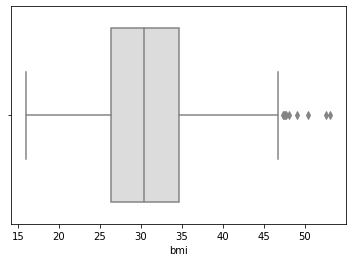

In [15]:
sns.boxplot(x=df['bmi'], palette='coolwarm')
plt.savefig('./storage/boxplot bmi.png')
plt.show()

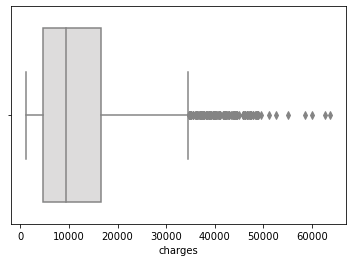

In [16]:
sns.boxplot(x=df['charges'], palette='coolwarm')
plt.savefig('./storage/boxplot charges')
plt.show()

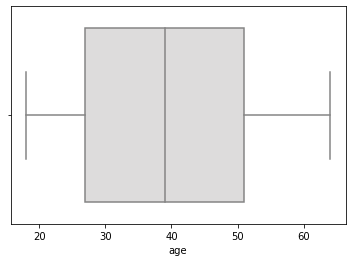

In [17]:
sns.boxplot(x=df['age'], palette='coolwarm')
plt.savefig('./storage/boxplot age')
plt.show()

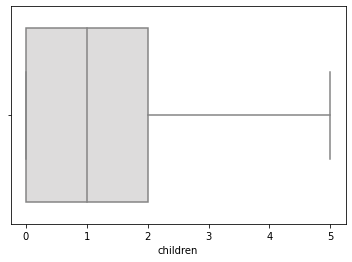

In [18]:
sns.boxplot(x=df['children'], palette='coolwarm')
plt.savefig('./storage/boxplot children.png')
plt.show()

In [19]:
def find_outlier(yourList):
    Q1 = np.quantile(yourList, .25)
    Q3 = np.quantile(yourList, .75)

    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    
    outlier = []
    for i in range(len(yourList)):
        if yourList[i] > batas_atas:
            outlier.append(yourList[i])
        if yourList[i] < batas_bawah:
            outlier.append(yourList[i])
    return len(outlier)

In [20]:
list_random_data = df.bmi.tolist()

find_outlier(list_random_data)

9

In [21]:
list_random_data = df.charges.tolist()

find_outlier(list_random_data)

139

In [22]:
(139/len(df)) * 100

10.388639760837071

**Adanya data outliers pada kolom 'bmi' dan 'charges'. Data outliers tersebut, tidak saya drop. melihat ada 139 data outliers pada charges, 10% dari keseluruhan data**

#### Menyimpan dataset untuk default machine learning

In [23]:
df_clean = df.to_csv('clean.csv')

# 2. EDA

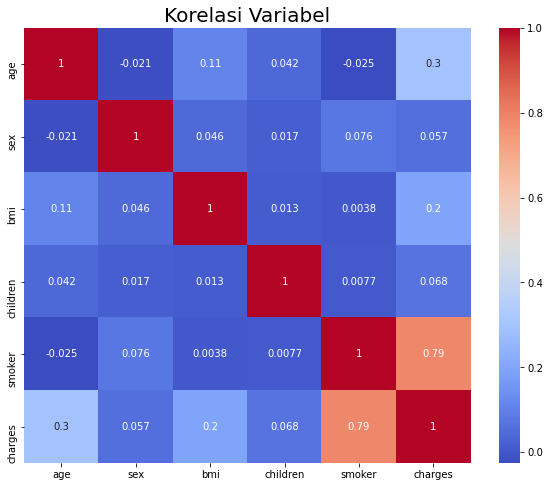

In [24]:
plt.figure(figsize=(10,8))
plt.title('Korelasi Variabel', size = 20)
sns.heatmap(df.corr(), cmap='coolwarm', annot = True)
plt.savefig('./storage/Korelasi Variabel')
plt.show()

Korelasi yang tinggi pada kategori 'smoker'

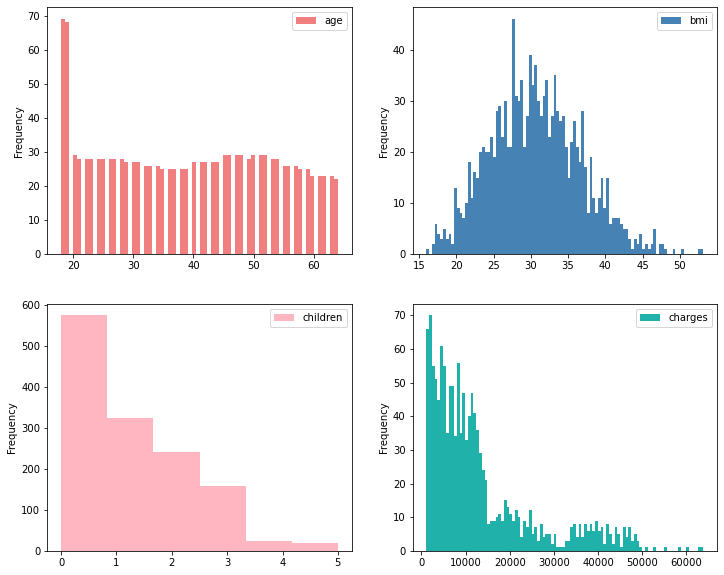

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
df.plot(kind="hist", y="age", bins=70, color="lightcoral", ax=axes[0][0])
df.plot(kind="hist", y="bmi", bins=100, color="steelblue", ax=axes[0][1])
df.plot(kind="hist", y="children", bins=6, color="lightpink", ax=axes[1][0])
df.plot(kind="hist", y="charges", bins=100, color="lightseagreen", ax=axes[1][1])
plt.savefig('./storage/frekuensi per data')
plt.show()

Pada dataset, nasabah terbanyak pada usia dibawah 20 tahun, BMI diantara 25 - 35, yang tidak memiliki anak, dan memiliki charges dibawah 20000 USD

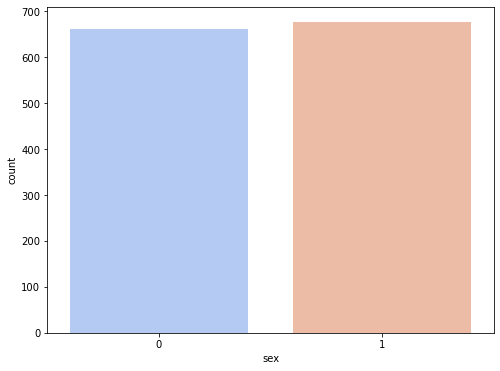

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(df.sex, palette='coolwarm')
plt.savefig('./storage/jumlah gender')
plt.show()

Tidak ada perbedaan yang signifikan antara kedua gender

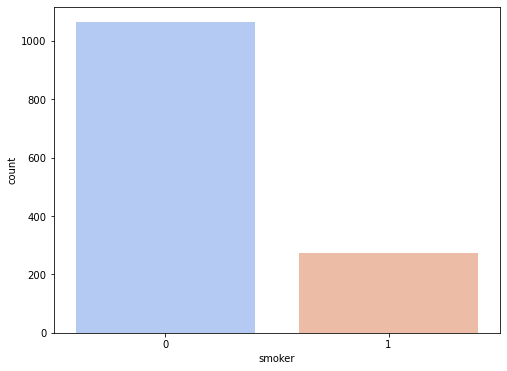

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(df.smoker, palette='coolwarm')
plt.savefig('./storage/jumlah smoker')
plt.show()

Nasabah lebih banyak yang tidak merokok dibandingkan yang merokok pada dataset

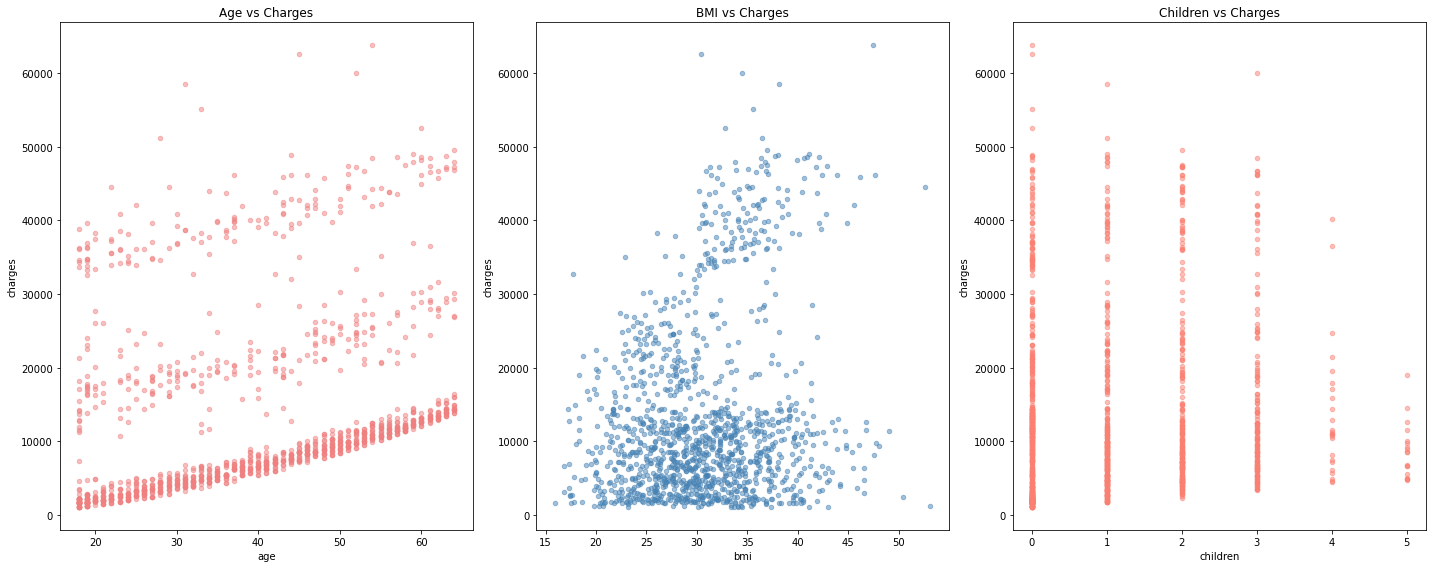

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
df.plot(kind='scatter', x='age', y='charges', alpha=0.5, color='lightcoral', ax=axes[0], title="Age vs Charges")
df.plot(kind='scatter', x='bmi', y='charges', alpha=0.5, color='steelblue', ax=axes[1], title="BMI vs Charges")
df.plot(kind='scatter', x='children', y='charges', alpha=0.5, color='salmon', ax=axes[2], title="Children vs Charges")
plt.savefig('./storage/charges vs age, bmi, children')
plt.tight_layout()
plt.show()

jika dibandingkan dengan charges, terlihat pada usia, semakin bertambah usia, semakin besar juga charges-nya. jika dilihat dari grafik bmi, charges tertinggi berada pada bmi yang besar juga. untuk grafik children, charges tertinggi dimiliki nasabah yang tidak memiliki anak

#### Smoker & Non-Smoker

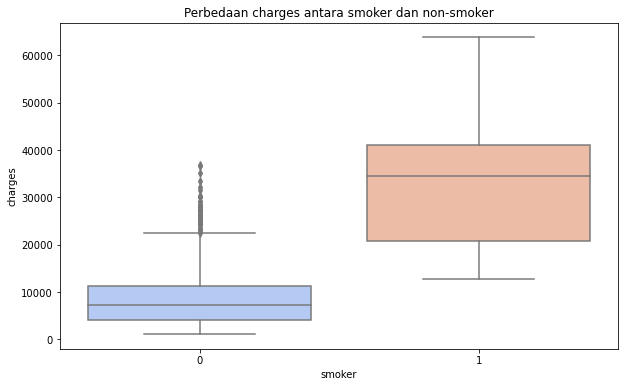

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(df['smoker'],df['charges'],palette='coolwarm')
plt.title('Perbedaan charges antara smoker dan non-smoker')
plt.savefig('./storage/Charges x Smoker')
plt.show()

Grafik ini menunjukkan bahwa nasabah perokok mempunyai charges yang lebih besar dibandingkan dengan nasabah yang non-perokok

In [30]:
df[(df['charges'] > 0)].groupby('smoker').describe()['charges'].sort_values(by='max')

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
0,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
1,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


- charges pada smoker mulai dari > 10000 USD dan ada yang membayar lebih dari 60000 USD
- sedangkan dengan non-smoker charges dimulai dibawah 10000 USD dan harga tertinggi kurang dari 40000 USD

#### Usia

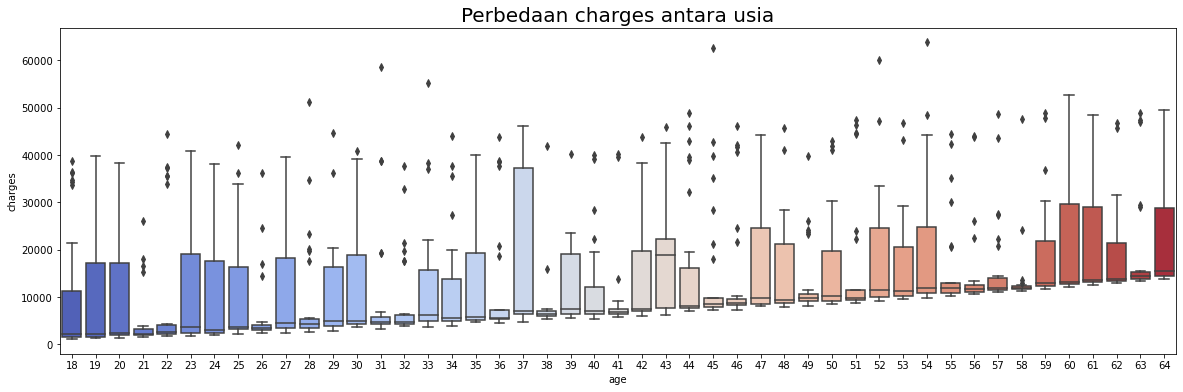

In [31]:
plt.figure(figsize=(20,6))
sns.boxplot(df['age'],df['charges'],palette='coolwarm')
plt.title('Perbedaan charges antara usia', size = 20)
plt.savefig('./storage/charges vs usia')
plt.show()

In [32]:
df[(df['charges'] > 0)].groupby('age').describe()['charges'].sort_values(by='min')

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
18,69.0,7086.217556,10198.459989,1121.87390,1633.044400,2198.189850,11272.331390,38792.68560
19,68.0,9747.909335,12469.537468,1241.56500,1639.563100,2135.891875,17148.980075,39722.74620
20,29.0,10159.697736,12049.624794,1391.52870,1967.022700,2459.720100,17085.267600,38344.56600
21,28.0,4730.464330,6168.059334,1515.34490,1985.288350,2254.423600,3205.349713,26018.95052
22,28.0,10012.932802,14653.363670,1664.99960,2155.351375,2641.155700,4078.134675,44501.39820
23,28.0,12419.820040,13421.332226,1815.87590,2432.780150,3594.538000,19145.024148,40904.19950
24,28.0,10648.015962,12203.650633,1969.61400,2462.839600,3045.137650,17508.424985,38126.24650
25,28.0,9838.365311,11551.289468,2137.65360,3160.320800,3750.148925,16333.214445,42112.23560
26,28.0,6133.825309,7765.729490,2302.30000,2921.320525,3388.882175,3983.464100,36085.21900


- charges paling tinggi dibayar oleh nasabah dengan usia 54
- charges paling rendah dibayar oleh nasabah dengan usia 18
- grafik ini juga menunjukkan bahwa makin tua umur nasabah maka semakin besar chargesnya

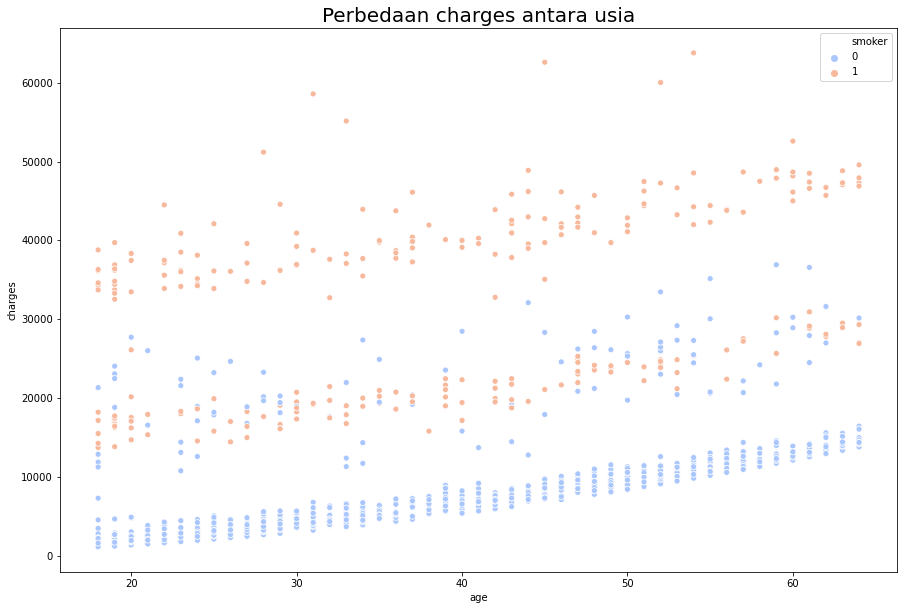

In [33]:
plt.figure(figsize=(15,10))
sns.scatterplot(df.age, df.charges, palette = 'coolwarm', hue=df.smoker)
plt.title('Perbedaan charges antara usia', size = 20)
plt.savefig('./storage/scatterplot age')
plt.show()

- grafik ini juga menunjukkan bahwa nasabah dengan usia yang lebih tua dan smoker memiliki charges yang lebih besar. Diperparah oleh faktor nasabah tersebut seorang perokok

#### Gender

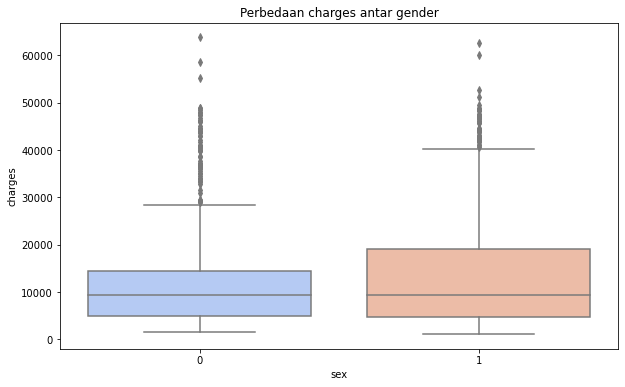

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(df['sex'],df['charges'],palette='coolwarm')
plt.title('Perbedaan charges antar gender')
plt.savefig('./storage/charges vs gender')
plt.show()

Nasabah yang ber-gender male lebih besar biaya asuransinya dibandingkan dengan nasabah yang ber-gender female, walaupun perbedaan tidak terlalu signifikan.

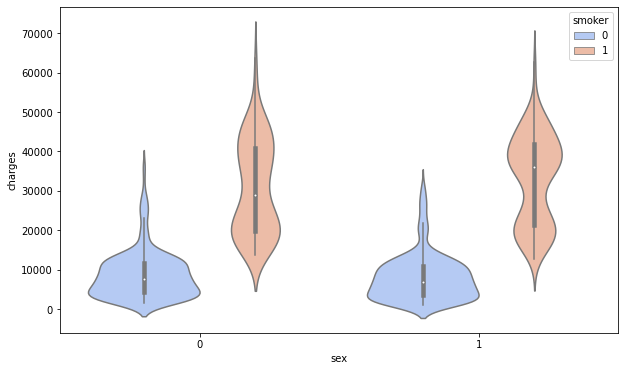

In [35]:
plt.figure(figsize=(10,6))
sns.violinplot(df.sex, df.charges, hue=df.smoker, palette='coolwarm')
plt.savefig('./storage/violinplot sex, smoker, charges')
plt.show()

Pada grafik dilihat persebaran datanya menunjukkan jika nasabah berjenis kelamin laki-laki / male dan merokok / smoker memang memiliki charges yang lebih tinggi

In [36]:
df[(df['charges'] > 0)].groupby('sex').describe()['charges'].sort_values(by='max')

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
1,676.0,13956.751178,12971.025915,1121.8739,4619.1340,9369.61575,18989.590250,62592.87309
0,662.0,12569.578844,11128.703801,1607.5101,4885.1587,9412.96250,14454.691825,63770.42801


- charge paling rendah adalah nasabah male dengan charges 1121
- charge paling tinggi adalah nasabah female dengan charges 63770 berbeda tipis dengan nasabah male dengan charges 62592

#### BMI

In [37]:
df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [38]:
df.bmi.nunique()

548

Pembuatan kategori hanya untuk melihat grafik lebih baik. dikarenakan, kategori BMI memiliki jumlah unique data sebanyak 548 data.

In [39]:
# TypeError: list indices must be integers or slices, not float
bmi_code = df.bmi.astype('int64')

bmi_code = bmi_code.tolist()
# bentuk float tidak dapat dimasukkan ke dalam suatu kategori. jadi saya ganti menjadi int64 dan masukkan ke dalam list. lalu saya kategorikan

In [40]:
code_bmi = []
for i in bmi_code:
    if bmi_code[i] <= 18.0:
        code_bmi.append('Underweight')
    elif 18.0 > bmi_code[i] <= 24.0:
        code_bmi.append('Healthy')
    elif 24.0 > bmi_code[i] <= 29.0:
        code_bmi.append('Overweight')
    elif 29.0 > bmi_code[i] <= 39.0:
        code_bmi.append('Obese')
    else:
        code_bmi.append('Extremely Obese')

In [41]:
df_with_code_bmi = df.copy()

In [42]:
df_with_code_bmi['bmi_code'] = code_bmi

In [43]:
df_with_code_bmi.head()

,age,sex,bmi,children,smoker,charges,bmi_code
0,19,0,27.900,0,1,16884.92400,Extremely Obese
1,18,1,33.770,1,0,1725.55230,Obese
2,28,1,33.000,3,0,4449.46200,Obese
3,33,1,22.705,0,0,21984.47061,Extremely Obese
4,32,1,28.880,0,0,3866.85520,Underweight


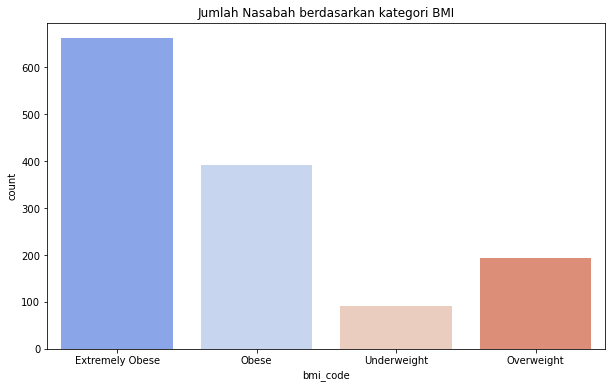

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(df_with_code_bmi.bmi_code, palette='coolwarm')
plt.title('Jumlah Nasabah berdasarkan kategori BMI')
plt.savefig('./storage/jumlah katergori BMI')
plt.show()

Pada grafik dapat dilihat, bahwa nasabah terbanyak memiliki BMI 'Extremely Obese' dan tidak ada nasabah yang memiliki BMI 'Healthy'. 

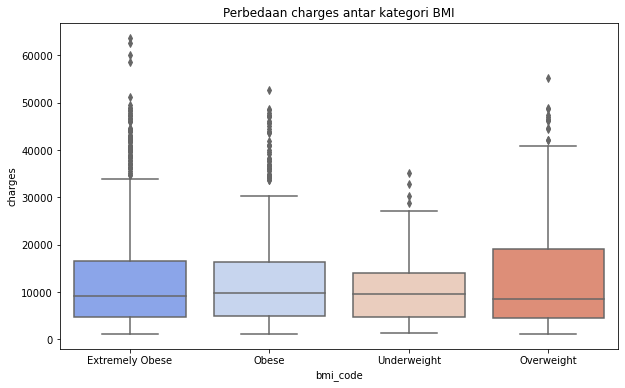

In [45]:
plt.figure(figsize=(10,6))
sns.boxplot(df_with_code_bmi['bmi_code'],df_with_code_bmi['charges'],palette='coolwarm')
plt.title('Perbedaan charges antar kategori BMI')
plt.savefig('./storage/charges vs kategori bmi')
plt.show()

In [46]:
df[(df['charges'] > 0)].groupby('bmi').describe()['charges'].sort_values(by='min')

,count,mean,std,min,25%,50%,75%,max
bmi,,,,,,,,
23.21,5.0,10699.798088,11901.189392,1121.87390,1515.34490,3561.88890,22218.114900,25081.76784
30.14,2.0,6506.738100,7601.725288,1131.50660,3819.12235,6506.73810,9194.353850,11881.96960
33.33,7.0,14032.503766,15627.565592,1135.94070,2771.27870,8283.68070,23342.532700,36580.28216
33.66,5.0,7250.033200,6375.015792,1136.39940,2498.41440,4504.66240,12949.155400,15161.53440
34.10,8.0,12245.810147,13274.932799,1137.01100,4800.15875,8279.73650,12853.425545,40182.24600
...,...,...,...,...,...,...,...,...
37.70,1.0,48824.450000,NaN,48824.45000,48824.45000,48824.45000,48824.450000,48824.45000
36.96,1.0,49577.662400,NaN,49577.66240,49577.66240,49577.66240,49577.662400,49577.66240
36.40,1.0,51194.559140,NaN,51194.55914,51194.55914,51194.55914,51194.559140,51194.55914


Pada tabel dapat dilihat dari data minimal charges, bahwa semakin besar nilai BMI maka semakin besar juga chargesnya

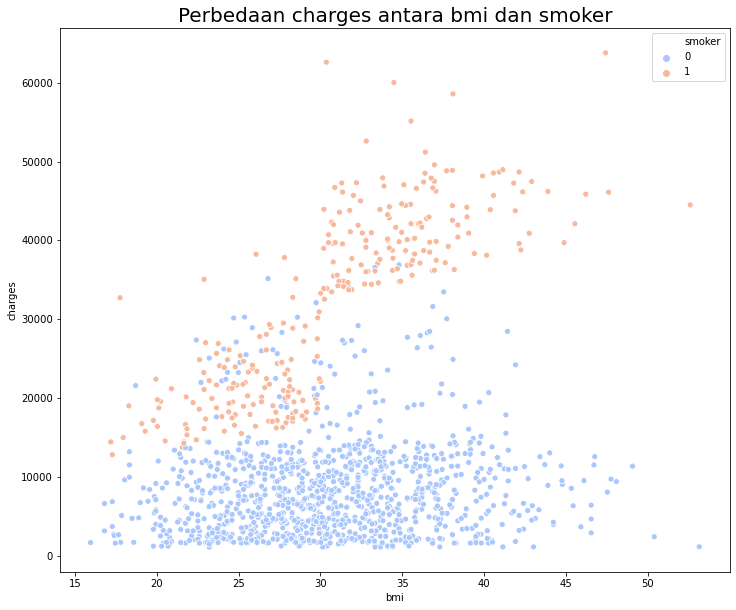

In [47]:
plt.figure(figsize=(12,10))
sns.scatterplot(df.bmi, df.charges, palette = 'coolwarm', hue=df.smoker)
plt.title('Perbedaan charges antara bmi dan smoker', size = 20)
plt.savefig('./storage/scatterplot bmi')
plt.show()

Grafik ini menunjukkan, bahwa nasabah dengan bmi yang besar dan merokok memiliki charges yang lebih tinggi

#### Children

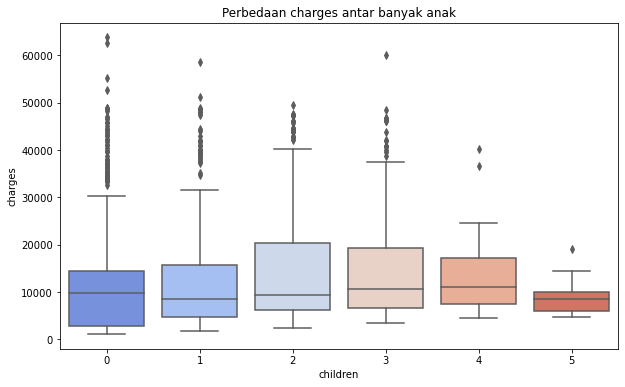

In [48]:
plt.figure(figsize=(10,6))
sns.boxplot(df['children'],df['charges'],palette='coolwarm')
plt.title('Perbedaan charges antar banyak anak')
plt.savefig('./storage/charges vs children')
plt.show()

Grafik ini dilihat, jika charges paling tinggi dan paling rendah dimiliki oleh nasabah yang tidak memiliki anak

In [49]:
df[(df['charges'] > 0)].groupby('children').describe()['charges'].sort_values(by='min')

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,574.0,12365.975602,12023.293942,1121.8739,2734.421150,9856.95190,14440.123825,63770.42801
1,324.0,12731.171832,11823.631451,1711.0268,4791.643175,8483.87015,15632.052050,58571.07448
2,240.0,15073.563734,12891.368347,2304.0022,6284.939437,9264.97915,20379.276748,49577.66240
3,157.0,15355.318367,12330.869484,3443.0640,6652.528800,10600.54830,19199.944000,60021.39897
4,25.0,13850.656311,9139.223321,4504.6624,7512.267000,11033.66170,17128.426080,40182.24600
5,18.0,8786.035247,3808.435525,4687.7970,5874.973900,8589.56505,10019.943975,19023.26000


Pada tabel dapat dilihat dari data minimal charges, bahwa semakin banyak anak yang ditanggung maka semakin besar juga chargesnya

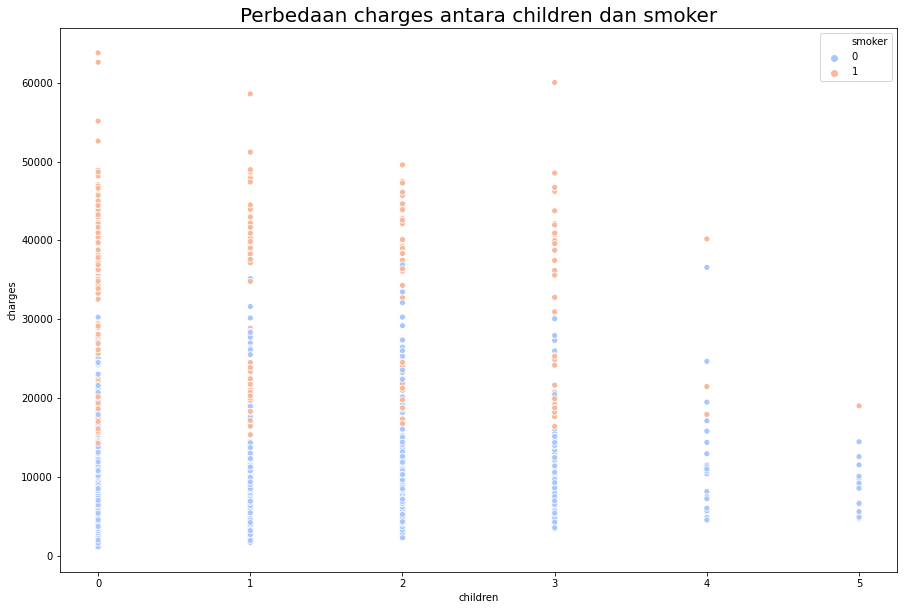

In [50]:
plt.figure(figsize=(15,10))
sns.scatterplot(df.children, df.charges, palette = 'coolwarm', hue=df.smoker)
plt.title('Perbedaan charges antara children dan smoker', size = 20)
plt.savefig('./storage/scatterplot children')
plt.show()

Pada grafik dapat dilihat, bahwa nasabah yang bukan perokok memiliki charges yang lebih rendah jika dibandingkan dengan nasabah yang perokok walaupun tidak memiliki anak

#### Melihat distribusi data pada setiap kolom numberik

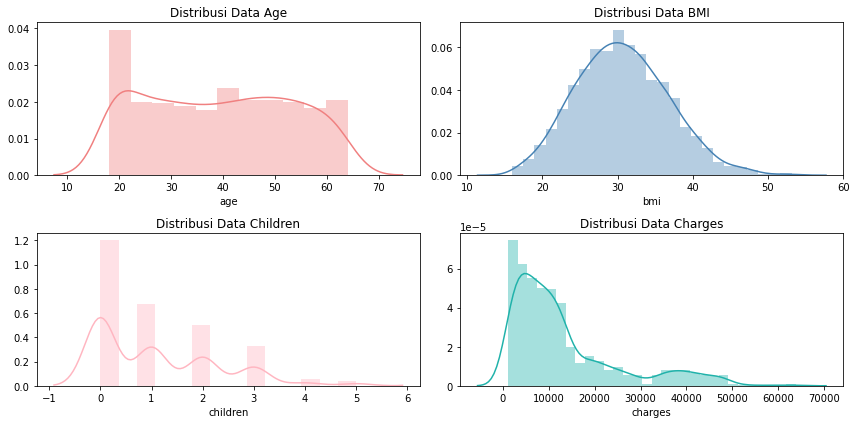

In [51]:
plt.figure(figsize=(12,6))
plt.subplot(221)
sns.distplot(df.age, color = "lightcoral")
plt.title('Distribusi Data Age')

plt.subplot(222)
sns.distplot(df.bmi, color = "steelblue")
plt.title('Distribusi Data BMI')

plt.subplot(223)
sns.distplot(df.children, color = "lightpink")
plt.title('Distribusi Data Children')

plt.subplot(224)
sns.distplot(df.charges, color = "lightseagreen")
plt.title('Distribusi Data Charges')

plt.savefig('./storage/distribusi data numberik')
plt.tight_layout()
plt.show()

hanya data BMI yang terdistribusi normal. dengan tujuan goals pada charges, maka data tersebut merupakan data tidak terdistribusi normal